In [10]:
## Importing all the necessary libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
## Mounting drive inorder to read data
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/drive/My Drive/training'
test_path = '/content/drive/My Drive/testing'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
## Fetching the train images and label information
trainimages = []  
trainlabels =[]     
i = 0
for folder in os.listdir('gdrive/My Drive/training'):
  train_path = 'gdrive/My Drive/training/'+folder
  for filename in os.listdir(train_path):
        
        image_path = train_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(10,10))

        trainlabels.append(i)
        
        trainimages.append(img)
  i=i+1

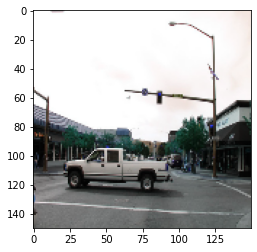

In [ ]:
plt.imshow(trainimages[2122])

In [14]:
## Fetching the test images and label information
testimages = []  
testlabels =[]     
j = 0
for folder in os.listdir('gdrive/My Drive/testing'):
  test_path = 'gdrive/My Drive/testing/'+folder
  for filename in os.listdir(test_path):
        
        image_path = test_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(10,10))

        testlabels.append(j)
        
        testimages.append(img)
  j=j+1


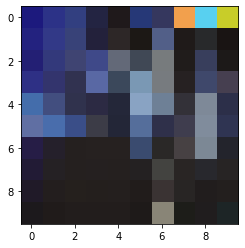

In [15]:
plt.imshow(testimages[540])
plt.show()

In [18]:
## Converting into array and normalize
trainimages = np.array(trainimages)
trainimages = trainimages/255.0
trainlabels=np.array(trainlabels)
testimages = np.array(testimages)
testimages = testimages/255.0
testlabels=np.array(testlabels)

In [19]:
testlabels=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
             3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,
11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,
12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,
15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,
13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,
14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,
]

In [20]:
## Spliting Train and Validation data
trainimages, valimages, trainlabels, vallabels = train_test_split(trainimages, trainlabels, test_size=0.2, shuffle=True)

In [ ]:
## Creating model for our CNN

regularizer = regularizers.l1(l=0.001) 
model = Sequential()
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizer,input_shape=(10,10,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(19))
model.add(Activation('softmax'))

## Compiling the model 
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()
## Fitting the model
history=model.fit(trainimages, trainlabels, batch_size=30, epochs=10, validation_data=(valimages, vallabels),shuffle='False')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          1792      
                                                                 
 activation_6 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 activation_7 (Activation)   (None, 2, 2, 64)          0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 2s 10ms/step - loss: 2.9988 - accuracy: 0.0849 - val_loss: 2.9482 - val_accuracy: 0.1034
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 2.8558 - accuracy: 0.1530 - val_loss: 2.7835 - val_accuracy: 0.1685
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 2.6848 - accuracy: 0.1800 - val_loss: 2.6914 - val_accuracy: 0.1663
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 2.5903 - accuracy: 0.2188 - val_loss: 2.6362 - val_accuracy: 0.1730
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 2.5556 - accuracy: 0.2210 - val_loss: 2.6296 - val_accuracy: 0.2045
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 2.4943 - accuracy: 0.2407 - val_loss: 2.5759 - val_accuracy: 0.2067
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 2.4246 - accuracy: 0.2672 - val_loss: 2.5857 - val_accuracy: 0.2360
Epoch 8/10
60/60 [============

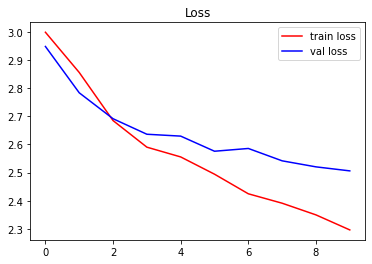

In [ ]:
## Training Loss Vs Validation Loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()


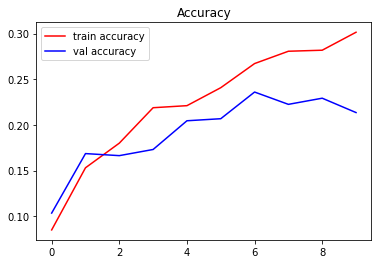

In [ ]:
## Plotting the Train Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

[[15  4  1  0  0  1  0  0  0  1  1  0  0  0  4  1  2  0  0]
 [ 2 10  0  0  0  3  0  0  0  0  1  1  4  0  6  0  3  0  0]
 [ 3  0  3  0  0  2  0  1  0  2  1  0  1  0  6  1 10  0  0]
 [ 5  2  0  2  0  0  1  0  0  1  0  1  0  4  4  7  1  0  2]
 [ 1  0  0  0  0  2  1  5  1  8  2  0  5  0  2  0  3  0  0]
 [ 4  5  0  0  0  3  0  0  1  1  0  0  2  1  2  0 11  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  1  0  0  4  0  1  1  0  0]
 [ 3  1  0  0  1  4  1  7  0  3  2  0  2  0  4  1  1  0  0]
 [ 3  3  2  0  0  1  1  1  0  1  2  0  1  0  6  0  8  1  0]
 [ 4  0  1  0  1  2  1  2  3  3  2  0  1  0  3  0  6  1  0]
 [ 4  3  0  0  0  0  2  1  1  3  7  0  2  5  0  0  2  0  0]
 [ 1  1  0  0  0  3  0  0  0  2  0  0  4  0 12  0  7  0  0]
 [ 4  2  0  1  0  1  0  0  0  1  2  1  2  0  1  0 15  0  0]
 [ 0  1  0  0  0  0 16  0  0  0  1  1  0  8  0  1  1  0  1]
 [ 6  1  1  0  0  1  0  0  0  3  1  0  4  0  8  1  4  0  0]
 [ 3  0  0  1  0  0  1  0  0  2  0  1  0  3  3 14  1  0  1]
 [ 3  0  0  0  0  9  0  1  2  3  3  0  0

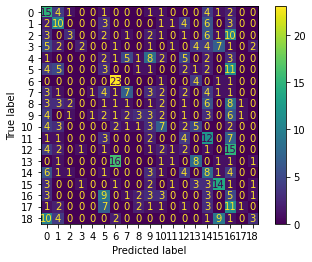

In [ ]:
## Plotting the Confusion matrix and Evaluvating the test accuracy
y_pred1 = model.predict(testimages)
y_pred1 = np.argmax(y_pred1, axis=1)
cm = confusion_matrix(testlabels, y_pred1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
## Test Accuracy
print(accuracy_score(testlabels, y_pred1))